# Beginning interactivity with tabular data: ipywidgets

## ipywidgets: More details

Import our usual things:

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Also import ipywidgets:

In [2]:
import ipywidgets

This is how we've used widgets before for the most part with the weird "decorator" function that "decorates" whatever function directly follows it:

In [3]:
@ipywidgets.interact(name = ['Linda', 'Tina', 'Louise'])
def print_name(name):
    print(name) # just a simple print out

interactive(children=(Dropdown(description='name', options=('Linda', 'Tina', 'Louise'), value='Linda'), Output…

### Let's make sure we can mess with widgets

But now, lets go into ipywidgets in a bit more detail and look at specific functions and call them directly from ipywidgets.

For example, we can create a little display that increments integer numbers:

In [4]:
itext = ipywidgets.IntText()
itext

IntText(value=0)

But what if that didn't display for you?  Depending on what version of jupyter notebook you have, you might have to use "display" to actually show your widgets.  

Try (uncommenting) the following:

In [5]:
#from IPython.display import display
#display(itext)

Still didn't work?  Try refreshing and/or restarting your notebook.

*Still* not working?  You might have to install the jupyter notebook widget extension:

In [6]:
#!jupyter nbextension enable --py widgetsnbextension

If you end up running the above cell (uncommented naturally!) then you might have to refresh or restart your jupyter notebook.

Moving on: 

The value of `itext` is then stored - so we could in theory generate a toggle and then do stuff with its value:

In [7]:
itext.value

0

Note if I go up and change the toggle value I have to re-run this cell to print out the newly stored value.

I can also set the value "by hand":

In [8]:
itext.value = 10

Once I run this cell, now the toggle values are updated above.

### Building up interfaces with ipywidgets

Let's start thinking about how we can link up widgets together to make interfaces!

Let's start making up a little progress bar, and I'm going to set it at 90%:

In [9]:
ip = ipywidgets.IntProgress(value = 90)
ip

IntProgress(value=90)

Let's think about how we'd link up this with a little integer slider to change our value:

In [10]:
irange = ipywidgets.IntSlider(min = 0, max = 100, step = 1)
irange

IntSlider(value=0)

Right now I can change one and not the other, so that's not what we are going for.  We have to "link" whatever is in our widgets that controls both our progress bar and our integer slider.  

But what do we link?  Let's see whats "in" our different widgets:

In [11]:
ip.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'bar_style',
 'description',
 'description_tooltip',
 'layout',
 'max',
 'min',
 'orientation',
 'style',
 'value']

In [12]:
irange.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

So, there are a lot of parameters here, but one thing that is pretty standard across all widgets is that they have some sort of "value" that can be updated, for example, behold:

In [13]:
ip

IntProgress(value=90)

In [14]:
ip.value=10

How do we link the values of these two widgets?  With a function called `jslink`:

In [15]:
ipywidgets.jslink?

Let's give it a shot!

In [16]:
ipywidgets.jslink((ip,'value'), (irange,'value'))

Link(source=(IntProgress(value=10), 'value'), target=(IntSlider(value=0), 'value'))

Let's see!

In [17]:
ip

IntProgress(value=10)

In [18]:
irange

IntSlider(value=10)

Cool!  Note that they are all linked -- every instance!

So, we probably want to display these two widgets on top of eachother, how can we do that?

ipywidgets has a bunch of layout options we can use:

In [19]:
ipywidgets.VBox([ip, irange])

What does this `jslink` function do?  We know it links the values, but how?  It does this on the "browser side", but what does that mean?

There are actually 2 different programming languages operating when you are using a jupyter notebook:
 1. Python is used to do your calculations
 1. Javascript is used to "report" back the outputs from Python

Here `jslink` means that the link between your progress bar and slider is happening through Javascript, and happens all within your browser - Python is never contacted about anything in this case!

We'll see in a second that there are some instances where we want more options than presented with `jslink` and so we'll actually want Python to get involved in the linking of things.  

Let's redo what we just did but getting Python involved:

In [21]:
ip2 = ipywidgets.IntProgress(value = 90)
irange2 = ipywidgets.IntSlider(min = 0, max = 100, step = 1)
ipywidgets.link((ip2,'value'), (irange2,'value')) # here is the change: "jslink" changes to "link"
ipywidgets.VBox([ip2, irange2])

So, just looking at it, it looks exactly the same!  However, we did did this through *Python* this time.

In this sense we add an extra step:
 1. first the browser senses a change when you move the slider (Javascript)
 1. sends this info to the kernel (Javascript -> Python)
 1. Python registers this change and figures out what to do with it, in this case it says to update the progress bar (Python)
 1. Python then tells the browser to update the progress bar (Python -> Javascript)
 1. the browser displays the change in the progress bar (Javascript)

Ok, that's a little complicated.  The big question you can ask yourself is: Do we really care?  At the moment, no - we can do everything we want using Python/JS in these notebooks, doesn't really affect us one way or the other.  When we start thinking about developing for the web however, we have to think carefully about how to design things because a remote browser only has access to JS by default!  But by then we'll be learning Javascript anyway, so not to worry!

For now, let's move on and worry about this JS/Python linking distinction later.

Let's try making a button that does something when we press it:

In [25]:
button = ipywidgets.Button(description = "I am a Clicker")
button

Button(description='I am a Clicker', style=ButtonStyle())

I have clicked. Click.
I have clicked. Click.


So, obviously, we want to do something cool when the button is clicked.  To do that, first we make a function that will do something when we click our button:

In [26]:
# let's just say I've clicked:
def say_click(event):
    print("I have clicked. Click.")

Now we have to link our button click to this function, which is more complicated then what `jslink` can handle, so we use the "on_click" function associated with this button through the Python-linking channel:

In [27]:
button.on_click(say_click)

Now, note that if we go back and press our button, it now prints our statement.  This seems indeed like magic, but its using "callbacks" to look for changes via Python.  Practically, we don't have to worry about what is going on under the hood for what we want to do with ipywidgets, but it is none-the-less pretty neat. :)

Let's build up a bit more complex interactivity using our new friend the button and this "on_click" function to interactively update our progress bar.

Lets start by making a progress bar again:

In [29]:
ip = ipywidgets.IntProgress()

Now, lets add in a button that will add 10:

In [30]:
button_plus = ipywidgets.Button(description = "+10")

... and one that will subtract 10:

In [32]:
button_minus = ipywidgets.Button(description = "-10")

Lets see how this looks in a horizontal box row:

In [34]:
ipywidgets.HBox([button_minus, ip, button_plus])

Note if we click these, nothing happens. This is because we haven't associated actions to our clicks just yet.  We have to make some functions that will tell our buttons and progress bar what to do when each respective button is clicked.  So, let's do that!

First, let's remind ourselves what we want to be changing here -- the value of the progress bar:

In [36]:
ip.value

0

Lets now associate a change in the value of our progress bar when we click the down button:

In [35]:
def click_down(event):
    ip.value -= 10

Note that while I'm going to associate the click of my button with the `-10` button the *action* that happens when I click is to change the value of the progress bar!

Lets tie this change in value to the click with the "on_click" function of our down button:

In [37]:
button_minus.on_click(click_down)

Now let's do the same for our "+10" button:

In [38]:
def click_up(event):
    ip.value += 10
button_plus.on_click(click_up)

We can now go back up and click on our progress bar, or we can re-display again as well:

In [39]:
ipywidgets.HBox([button_minus, ip, button_plus])

## A few more ipywidget linking practice examples

Let's try a few more!

### #1: More with layouts (and text boxes) -- OPTIONAL-ISH

We can use ipywidgets to create text boxes:

In [49]:
ta1 = ipywidgets.Textarea("Hi, this is a box of text. (1)")

ta2 = ipywidgets.Textarea("Hi, this is a box of text. (2)")

ta3 = ipywidgets.Textarea("Hi, this is a box of text. (3)")

ta4 = ipywidgets.Textarea("Hi, this is a box of text. (4)")

There are different ways we can layout these text boxes.

We can make tabs:

In [60]:
tabs = ipywidgets.Tab([ta1, ta2, ta3, ta4])
tabs

Or we can "accordian" them:

In [61]:
acc = ipywidgets.Accordion([ta1, ta2, ta3, ta4])
acc

Accordion(children=(Textarea(value='Hi, this is a box of text. (1)'), Textarea(value='Hi, this is a box of tex…

We can organize them into horizontal boxes like we did before:

In [62]:
ipywidgets.HBox([ta1, ta2, ta3, ta4])

Note this means a few of them are off screen so this might not be the best option in this calse.

We can organize them in a vertical box instead:

In [63]:
ipywidgets.VBox([ta1, ta2, ta3, ta4])

Or, if we want to be super fancy we can organize them in a verticle box of sets of horizontal boxes:

In [64]:
ipywidgets.VBox( [ipywidgets.HBox([ta1, ta2]),
                  ipywidgets.HBox([ta3, ta4])] )

We can even insert another widget in our array of horizontal boxes and see how ipywidgets would place it -- let's try it with a label widget:

In [65]:
ipywidgets.VBox( [ipywidgets.HBox([ta1, ta2]),
                  ipywidgets.Label("Hello there!"),
                  ipywidgets.HBox([ta3, ta4])] )

### #2: More with layouts (and text boxes) -- putting together sliders with play button -- OPTIONAL

As a quick example, lets link an integer slider to our play button.  First, lets define the range of our play button:

In [69]:
play = ipywidgets.Play(interval = 50, value = 50, min = 1, max = 100, step = 1, description = "Press Play")

Here, we start at 50, and create min and max value around that. Now, lets create our slider:

In [70]:
slider = ipywidgets.IntSlider()

Now let's link the min and max of the play interval with the min and max of the integer slider using the `jslink` function:

In [72]:
ipywidgets.jslink((play, 'min'), (slider, 'min'))
ipywidgets.jslink((play, 'max'), (slider, 'max'))
ipywidgets.jslink((play, 'value'), (slider, 'value'))

Link(source=(Play(value=1, description='Press Play', interval=50, min=1), 'value'), target=(IntSlider(value=50…

Note that we don't have to tell the .link function how to link these objects - it knows intuatively. How to link the play widget min & max to the slider min and max.

Finally, let's display them side by side:

In [73]:
ipywidgets.HBox([play, slider])

### #3: slider colorpicker and an intro to traitlets and .observe -- NECESSARY FOR TRAITLETS

Lets first make a slider:

In [74]:
islider = ipywidgets.IntSlider(min = 0, max = 10, step = 1, orientation = 'vertical')

Lets give this slider a base color that is sort of purple-y, using a hex code.  Recall: HTML hex codes are another way to "name" colors:

<img src="https://i.pinimg.com/originals/7b/f7/c6/7bf7c6e53128592dcd608f368571821c.gif">

In [75]:
islider.style.handle_color = "#750075"

Let's take a quick look:

In [76]:
islider 

IntSlider(value=0, max=10, orientation='vertical', style=SliderStyle(handle_color='#750075'))

Just slides up and down, nothing too exciting.  Lets create a new widget object called a color picker to pick the color of our handle:

In [77]:
cp = ipywidgets.ColorPicker()
cp

ColorPicker(value='black')

When we show this we can click on the little box and it pops up a color picker we can mess around with!  Neato.

Now let's link the slider's color with the color picker's value.  For practice, let's use the Python-based `link` function:

In [78]:
ipywidgets.link( (cp, 'value'), (islider.style, 'handle_color') )

And let's see them both together:

In [79]:
ipywidgets.VBox([cp, islider])

But what is this `traitlets.traitlets` thing above that occurs when we use `link` instead of `jslink`?  I thought we were doing things with widgets!  Let's talk a bit about what `traitlets` are in Python.

## Traitlets --- SAVE THIS FOR BQPLOT NEXT WEEK?? 

Traitlets are a way to link the *change in a variable* to an action.

We'll start by making a class w/o using traitlets.  We've worked with classes before, just sort of "under the radar" like with Pandas objects.  Now we will define our own:

In [126]:
class MyObject():
    name = 'unnamed'
    age = 0

Let's define a new variable of this `class` type:

In [127]:
my_obj = MyObject()

In [128]:
my_obj.name, my_obj.age

('unnamed', 0)

We can update the values of these variables like we would any other object:

In [129]:
my_obj.name = 'Bob'; my_obj.age = 47

Now, let's check out our new values:

In [132]:
print('Hello, my name is:', my_obj.name, 'and I am', my_obj.age, 'years old')

Hello, my name is: Bob and I am 47 years old


Now, let's say I wanted to re-set the values of the variables in my class -- to print out the above statement, I'd have to redo everything:

In [133]:
my_obj.name = 'Linda'; my_obj.age = 45

In [134]:
print('Hello, my name is:', my_obj.name, 'and I am', my_obj.age, 'years old')

Hello, my name is: Linda and I am 45 years old


The `traitlets` library allows us to "track" changes so that we can associate actions with updates to variables.  Let's try this example again:

In [139]:
import traitlets

In [142]:
class MyTraitletObject(traitlets.HasTraits):
    # lets use the unicode trait to let our object have a name
    name = traitlets.Unicode("unnamed") 
    # lets also give our object an age
    age = traitlets.Int(0)

In [143]:
my_t_obj = MyTraitletObject()
my_t_obj.age = 47
my_t_obj.name = 'Bob'

In [144]:
print('Hello, my name is:', my_t_obj.name, 'and I am', my_t_obj.age, 'years old')

Hello, my name is: Bob and I am 47 years old


So far this is not very exciting - we are back where we started!  However, there are options to "observe" changes in our traits:

Let's create a function that can act on one of the variables of our variables, in particluar, its going to react to the name in my object:

In [145]:
def name_changed(change):
    print(change) # this is a format that is required of a traitlets class

# lets tell traitlets that we are going to change something
my_t_obj.observe(name_changed, ['name'])

Now when we update, we get info about our update back:

In [146]:
my_t_obj.name = 'Linda'

{'name': 'name', 'old': 'Bob', 'new': 'Linda', 'owner': <__main__.MyTraitletObject object at 0x7f9318e34d90>, 'type': 'change'}


We can see that there are these weird "new" and "old" names -- this is tracking how things change. The "owner" is just pointing to the memory location of `my_t_obj`.

Let's do something a little more exciting - have a default print-out of the introduction:

In [150]:
def name_changed2(change):
    print('Hello, my name is', change['new'], 'and I am', change['owner'].age, 'years old')

# lets tell traitlets that we are going to change something
my_t_obj.observe(name_changed2, ['name'])

In [151]:
my_t_obj.name = 'Linda'

{'name': 'name', 'old': 'Bob', 'new': 'Linda', 'owner': <__main__.MyTraitletObject object at 0x7f9318e34d90>, 'type': 'change'}
Hello, my name is Linda and I am 47 years old


Note that now, I've got *2* things associated with any changes -- let's take off the first one:

In [152]:
my_t_obj.unobserve(name_changed, ['name'])

In [153]:
my_t_obj.name = "Bob"

Hello, my name is Bob and I am 47 years old


We can practice by making a "watching for a change" function for age as well:

In [155]:
def age_changed(change):
    print('Hello, my name is', change['owner'].name, 'and I am', change['new'], 'years old')

my_t_obj.observe(age_changed, ['age'])

In [159]:
my_t_obj.age = 48

Hello, my name is Bob and I am 48 years old


### #4. Michigan colormap and scale - 2 ways with widgets

Let's go back to the Michigan dataset from last week.  First we read in and reshaped our dataset:

In [162]:
mich_filename = '/Users/jillnaiman/Downloads/michigan_lld.flt'
michigan = np.fromfile(mich_filename, dtype='f4').reshape((5365,4201))

We can take a quick look at our dataset:

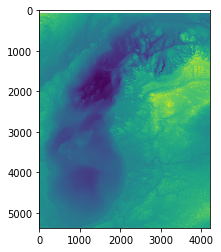

In [165]:
plt.imshow(michigan)
plt.show()

If we recall, we had to "mask" out the bad measurement at -9999:

In [163]:
michigan[michigan==-9999] = np.nan

... so that we could make a meaningful histogram:

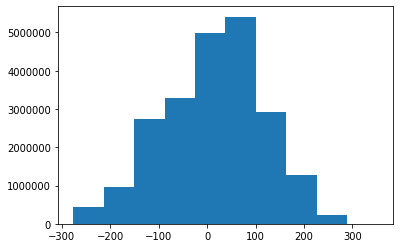

In [164]:
plt.hist(michigan[~np.isnan(michigan)])
plt.show()

Neat!  We also talked a bit about some ways we could transform the color scale for our `imshow` call above:

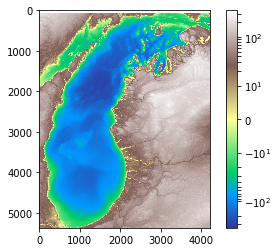

In [166]:
# for data color transformation
import matplotlib.colors as mpl_colors

plt.imshow(michigan, cmap="terrain", norm = mpl_colors.SymLogNorm(10)) # symmetric log scaling
plt.clim(-352,352) # symmetric about positive and negative heights
plt.colorbar()
plt.show()

What is this `SymLogNorm` function?

In [169]:
mpl_colors.SymLogNorm?

In [167]:
np.log10([1,10,50]),np.log10(np.abs([-1,-10,-50]))

(array([0.     , 1.     , 1.69897]), array([0.     , 1.     , 1.69897]))

We see that 1 and 10 are mapped to a jump of 1 but 1->50 is mapped only to a jump of 0.7 instead of 40.

One natural thing we might want to do is change color scheme and be able to toggle on and off the SymLogNorm color remapper.  We can do this 2 ways - by using our widget `@interact` decorator function again, and by explicitly laying out widgets.  Let's try to first way first:

In [175]:
@ipywidgets.interact(colormap = plt.colormaps(),
                     sym_log=True)
def plot(colormap = 'terrain', sym_log = True):
    if sym_log:
        norm = mpl_colors.SymLogNorm(10)
    else:
        norm = mpl_colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(6,8))
    # calling colorbar in a different way:
    CAX = ax.imshow(michigan, cmap=colormap, norm = norm)
    plt.colorbar(CAX, extend = 'both')
    plt.show()

interactive(children=(Dropdown(description='colormap', index=154, options=('Accent', 'Accent_r', 'Blues', 'Blu…

**Bonus:**

In [178]:
@ipywidgets.interact(colormap = plt.colormaps(), color_range = (1.0, 352.0, 1.0), 
                     sym_log=True)
def plot(colormap = 'terrain', color_range = 352, sym_log = True):
    if sym_log:
        norm = mpl_colors.SymLogNorm(10)
    else:
        norm = mpl_colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(6,8))
    # calling colorbar in a different way:
    CAX = ax.imshow(michigan, cmap=colormap, norm = norm)
    CAX.set_clim(-color_range, color_range)
    plt.colorbar(CAX, extend = 'both')
    plt.show()

interactive(children=(Dropdown(description='colormap', index=154, options=('Accent', 'Accent_r', 'Blues', 'Blu…

In [213]:
# working
from IPython.display import display,clear_output

fig, ax = plt.subplots(figsize=(4,4))

out=ipywidgets.Output(layout=ipywidgets.Layout(height='300px', width = '300px'))
button=ipywidgets.Button(description='Next')
vbox=ipywidgets.VBox(children=(out,button))
display(vbox)

def click(b):
    ax.clear()
    ax.plot(np.random.randn(100),np.random.randn(100),'+')
    with out:
        clear_output(wait=True)
        display(fig)

button.on_click(click)
click(None)

In [217]:
from IPython.display import display,clear_output, HTML
from ipywidgets.embed import embed_minimal_html

out=ipywidgets.Output(layout=ipywidgets.Layout(height='300px', width = '300px'))

@out.capture()
def make_fig():
    fig, ax = plt.subplots(figsize=(4,4))

    def click(b):
        ax.clear()
        ax.plot(np.random.randn(100),np.random.randn(100),'+')
        with out:
            clear_output(wait=True)
            display(fig)
            #display(ax.figure)
            #ax.figure

    button.on_click(click)
    click(None)

button=ipywidgets.Button(description='Next')
vbox=ipywidgets.VBox(children=(out,button))

embed_minimal_html('export.html', views=[vbox], title='Widgets export')

In [222]:
out = ipywidgets.Output()
display(out)

button=ipywidgets.Button(description='Next')

@out.capture()
def on_click(change):
    print(change['new'])
    
embed_minimal_html('export_button.html', views=[ipywidgets.VBox([button,out])], title='Widgets export')

Output()

In [230]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)

#myout = display(button, output)
#myout
myout = ipywidgets.VBox([button,output])
myout

In [231]:
embed_minimal_html('export_button.html', views=[myout], title='Widgets export')

In [215]:
# works
#slider = ipywidgets.IntSlider(value=40)
#embed_minimal_html('export_slider.html', views=[slider], title='Widgets export')

In [200]:
# %matplotlib inline

# # To prevent automatic figure display when execution of the cell ends
# #%config InlineBackend.close_figures=False 

# import matplotlib.pyplot as plt
# import numpy as np

# #from IPython.html import widgets
# from ipywidgets import widgets
# from ipywidgets import Layout
# from IPython.display import display,clear_output

# plt.ioff()
# ax=plt.gca()

# out=widgets.Output(layout=Layout(height='300px', width = '400px', border='solid'))
# button=widgets.Button(description='Next')
# vbox=widgets.VBox(children=(out,button))
# display(vbox)

# def click(b):
#     ax.clear()
#     ax.plot(np.random.randn(100),np.random.randn(100),'+')
#     with out:
#         clear_output(wait=True)
#         display(ax.figure)
#         #ax.figure

# button.on_click(click)
# click(None)

In [187]:
dropdown = ipywidgets.Dropdown(options=plt.colormaps())


def plot(colormap = dropdown, sym_log = True):
    if sym_log:
        norm = mpl_colors.SymLogNorm(10)
    else:
        norm = mpl_colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(6,8))
    # calling colorbar in a different way:
    CAX = ax.imshow(michigan, cmap=colormap, norm = norm)
    plt.colorbar(CAX, extend = 'both')
    plt.show()
    
dropdown.observe(plot, [''])

In [189]:
dropdown.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_options_labels',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description',
 'description_tooltip',
 'disabled',
 'index',
 'layout',
 'style']

In [194]:
dropdown.on_trait_change

<bound method HasTraits.on_trait_change of Dropdown(index=13, options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r

In [195]:
def print_change(change):
    print(change)
    
dropdown.observe(print_change, ['index'])

In [196]:
dropdown

Dropdown(index=13, options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuP…

{'name': 'index', 'old': 13, 'new': 8, 'owner': Dropdown(index=8, options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwa

In [ ]:
# 4: Using @interact vs. a .observe call -- NECESSARY
  # example: picking a color map for the michigan dataset & changing the log of the color scale on & off
  # example: changing the number of bins & the color of the bars of the depth plot using only .observes

In [ ]:
# 5: reading in the UFO dataset with column names and taking a look

In [ ]:
# 6: sub-setting the dataset for faster processing -> creating a subset dataframe for quick testing

In [ ]:
# 7: lab